Exercise 1 (PAMs, Notebook, 10P):

In [17]:
#!/usr/bin/python
import matplotlib.pyplot as plt
import numpy as np
import random

# amino acids
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Observed percent difference
observed_diff = [1] + list(range(5, 90, 5))

# Evolutionary distance in PAMs
evolutionary_dist = [1, 5, 11, 17, 23, 30, 38, 47, 56, 67, 80, 94, 112, 133, 159, 195, 246, 328]

"""
@Hamming distance : Defined between two strings of equal length, is the number of 
positions with mismatching characters.
@param: seq1: sequence 1, seq2: sequence 2
"""
def Hamming_distance(seq1, seq2):
    dist = 0
    for (a, b) in zip(seq1, seq2):
        if a != b:
            dist += 1
    return dist


"""
@evolutionary distance : dist += diff(seq1[i], seq2[i])
@param seq1: sequence 1, seq2: sequence 2
"""
def evolutionary_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        return -1
    dist = 0
    dist = Hamming_distance(seq1, seq2)
    return dist

"""
@get sequence : generates a random sequence of length n
@param: n: length of sequence
"""
def get_sequence(n):
    return ''.join(random.choices(aa, k=n))           

"""
@mutate sequence : mutates a sequence for the given several times
@param: seq: sequence to mutate, r: number of mutations
"""
def mutate_sequence(seq, r):
    mutated_aa = set(aa)
    mut_pos = random.sample(range(len(seq)), r)
    mutated_seq = list(seq)
    for pos in mut_pos:
        curr_base = mutated_seq[pos]
        mutated_aa.remove(curr_base)
        mutated_seq[pos] = random.choice(list(mutated_aa))
        mutated_aa.add(curr_base)
    return ''.join(mutated_seq)


"""
@simulate_PAM : simulates p PAM unit for the given parameters
@param: p: point accepted mutations or mutation steps, n: length of sequence
"""
def simulate_PAM_unit(p, n):
    seq = get_sequence(n)
    r = round(p * n / 100)
    seq_mut = mutate_sequence(seq, r)
    print(seq)
    print("|" * len(seq))
    print(seq_mut)
    print("evolutionary distance: " + str(evolutionary_distance(seq, seq_mut)))


"""
@repeat_simulation : repeats the PAMsimulation for the given parameters
@param: p: point accepted mutations or mutation steps, n: length of sequence, r: number of simulations, s: number of mutations per run
"""
def repeat_simulation(p, n, r, s):
    average_fraction_table = [[] for i in range(r)]
    for i in range(s):
        prev_seq = get_sequence(n)
        seq_mut = prev_seq
        for j in range(r):
            seq_mut = mutate_sequence(seq_mut, round(p * n / 100))
            average_fraction_table[j].append(evolutionary_distance(prev_seq, seq_mut) / n)
    return average_fraction_table

"""
@plot_simulation : plots the results of the simulation
@param: average_fraction_table: list of lists of fractions, evolutionary_dist: list of evolutionary distances
"""
def plot_simulation(average_fraction_table):
    r = 1 + np.arange(len(average_fraction_table))
    diff = []
    for i in range(len(average_fraction_table)):
        diff.append(sum(average_fraction_table[i]) * 100 / len(average_fraction_table[i]))
    plt.plot(r, diff, label = "uniform distribution")
    plt.title(" average fraction of difference positions")
    plt.xlabel("Number of simulations")
    plt.ylabel("Difference in percent")
    plt.legend()
    plt.show()
    return r, diff


Simulate $p$ PAM units of expected evolutionary change on a random amino-acid sequence of length
$n$

In [18]:
simulate_PAM_unit(10, 20)

GGPDQLSAMRKEKKLTNPAG
||||||||||||||||||||
GGPDQSSAMRKEKGLTNPAG
evolutionary distance: 2


Repeat the generation of random sequences and PAM
simulations $r$ times. Create a table with the average fraction of difference positions in the two
sequences after $s$ mutation steps. 

Discuss and visualize your results:
The difference in percent and number of simulations show a positive correlation. 
They also form a uniform distribution.

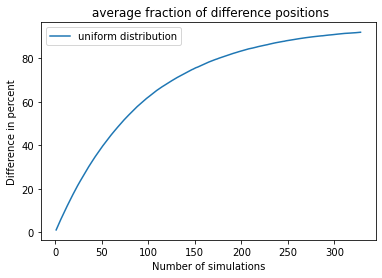

In [20]:
r, diff = plot_simulation(repeat_simulation(1, 300, 328, 200))

Why is a uniform distribution not suitable in a biological context? 
Because the amino acid mutations in the protein do not follow a uniform distribution

How could you find a more realistic mutation rate?
PAM uses normalized frequencies of amino acids to derive Mutation Probability Matrix as realistic mutation rate e.g PAM / 10000

How can you use a given PAM1 matrix in your simulations?
PAM1 / 10000 ---> realistic mutation rate for unit